# Data Analysis With SQL

In [60]:
import numpy as np
import pandas as pd 
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Hritik",
    database = "exam"
)
cursor = conn.cursor()
if conn.is_connected():
    print("Connected Successfully.")
else:
    print("Connection Error.")

Connected Successfully.


### 1. What is the average score for each subject?

In [5]:
cursor.execute("""
   SELECT 
    AVG(MathScore) AS Average_MathScore, 
    AVG(ReadingScore) AS Average_ReadingScore, 
    AVG(WritingScore) AS Average_WritingScore
   FROM ExamScore
""")
result = cursor.fetchall()
print("Average score of Math is ",result[0][0])
print("Average score of Reading is ",result[0][1])
print("Average score of Writing is ",result[0][2])

Average score of Math is  66.5708
Average score of Reading is  69.3859
Average score of Writing is  68.4363


### 2. How many students scored above 80 in Math?

In [6]:
cursor.execute("""
    SELECT COUNT(*) AS Students_abv80
    FROM ExamScore
    WHERE MathScore > 80
""")
result = cursor.fetchall()
print("Students who scored above 80 in maths",result[0][0])

Students who scored above 80 in maths 5591


### 3. How many students scored below 50 in any subject?

In [7]:
cursor.execute("""
  SELECT COUNT(*) FROM ExamScore
  WHERE MathScore < 50 OR
        ReadingScore < 50 OR
        WritingScore < 50
""")
result = cursor.fetchall()
print(result[0][0])

5388


### 4. What is the range of scores in each subject?

In [8]:
cursor.execute("""
  SELECT 
     MAX(MathScore) - MIN(MathScore) AS Range_of_MathScore,
     MAX(ReadingScore) - MIN(ReadingScore) AS Range_of_ReadingScore,
     MAX(WritingScore) - MIN(WritingScore) AS Range_of_WritingScore
  FROM ExamScore
""")
result = cursor.fetchall()
print(result)

[(100, 90, 96)]


### 5. Calculate the total score for each student.

In [9]:
cursor.execute("""
  SELECT MathScore + ReadingScore + WritingScore AS TotalScore
  FROM ExamScore
""")
result = cursor.fetchall()
print(result[0:10])

[(216,), (247,), (271,), (143,), (229,), (236,), (267,), (123,), (197,), (164,)]


### 6. Find the student with the lowest total score.

In [10]:
cursor.execute("""
  SELECT *
  FROM ExamScore 
  ORDER BY TotalScore 
  LIMIT 1
""")
result = cursor.fetchall()
print(result)

[(59, 'female', 'group C', 'some high school', 'free/reduced', 'none', 'single', 'regularly', 'yes', 3, 'school_bus', '> 10', 0, 17, 10, 27, 9, 'D')]


### 7. What percentage of students scored above 70 in all subjects?

In [11]:
cursor.execute("""
  SELECT *
  FROM ExamScore 
  WHERE Mathscore > 70 AND 
        Readingscore > 70 AND
        WritingScore > 70
""")
result = cursor.fetchall()


df = pd.DataFrame(result)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,female,,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,216,72,C
1,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,271,90,B
2,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75,229,76,B
3,5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,5 - 10,73,84,79,236,79,B
4,6,female,group B,some college,standard,completed,widowed,never,no,1,private,5 - 10,85,93,89,267,89,B


### 8. Count the number of students in each grade.

In [13]:
# First create a new column named as Grade
cursor.execute("""
  ALTER TABLE ExamScore
  ADD COLUMN Grade VARCHAR(1)
""")

In [11]:
# Now set Grade of all students
cursor.execute("""
   UPDATE ExamScore
   SET Grade = CASE
       WHEN Percentage > 90 THEN 'A'
       WHEN Percentage > 75 THEN 'B'
       WHEN Percentage > 50 THEN 'C'
       ELSE 'D'
       end
""")

In [13]:
# Count the students in each grade 
cursor.execute("""
  SELECT Grade, COUNT(*) 
  FROM ExamScore GROUP BY Grade
""")
result = cursor.fetchall()
for i in result:
    print(i)

('C', 16352)
('B', 7601)
('D', 3363)
('A', 1753)


### 9. What is the average MathScore, ReadingScore, and WritingScore for male and female students?

In [30]:
cursor.execute("""
  SELECT Gender, 
       AVG(MathScore) AS AvgMathScore, 
       AVG(ReadingScore) AS AvgReadingScore, 
       AVG(WritingScore) AS AvgWritingScore
  FROM ExamScore
  GROUP BY Gender
""")
result = pd.DataFrame(cursor.fetchall() , columns = ['Gender' , 'AvgMathScore' , 'AvgReadingScore' , 'AvgWritingScore'])
result

,Gender,AvgMathScore,AvgReadingScore,AvgWritingScore
0,female,64.0896,72.8629,72.8795
1,male,69.0813,65.8677,63.9406


### 10. Determine the mode of the scores in Reading.

In [14]:
cursor.execute("""
   SELECT ReadingScore, COUNT(*)
   FROM ExamScore 
   GROUP BY ReadingScore
   ORDER BY COUNT(*) DESC
   LIMIT 1
""")   
result = cursor.fetchall()
print("The MODE of Reading Score is",result[0][0],"because this numbers occurs",result[0][0],"times.")

The MODE of Reading Score is 65 because this numbers occurs 65 times.


### 11. Find the number of students who scored above the average score in maths

In [15]:
cursor.execute("""
    SELECT COUNT(*)
      FROM ExamScore
      WHERE MathScore > (SELECT AVG(MathScore) FROM ExamScore)
""")
result = cursor.fetchall()
print(result[0][0])

14686


### 12. How many students scored 100 in at least one subject?

In [16]:
cursor.execute("""
    SELECT COUNT(*)
    FROM Examscore 
    WHERE MathScore = 100 OR 
          ReadingScore = 100 OR
          WritingScore = 100
""")
result = cursor.fetchall()
print(result[0][0])

736


### 13. Identify the top 10% of students based on their total scores.

### 14. Analyze the correlation between Math and Reading scores.

In [17]:
cursor.execute("""
    SELECT MathScore , ReadingScore
    FROM ExamScore
""")
result = cursor.fetchall()
df = pd.DataFrame(result , columns = ['MathScore','ReadingScore'])
df.head()

,MathScore,ReadingScore
0,71,71
1,69,90
2,87,93
3,45,56
4,76,78


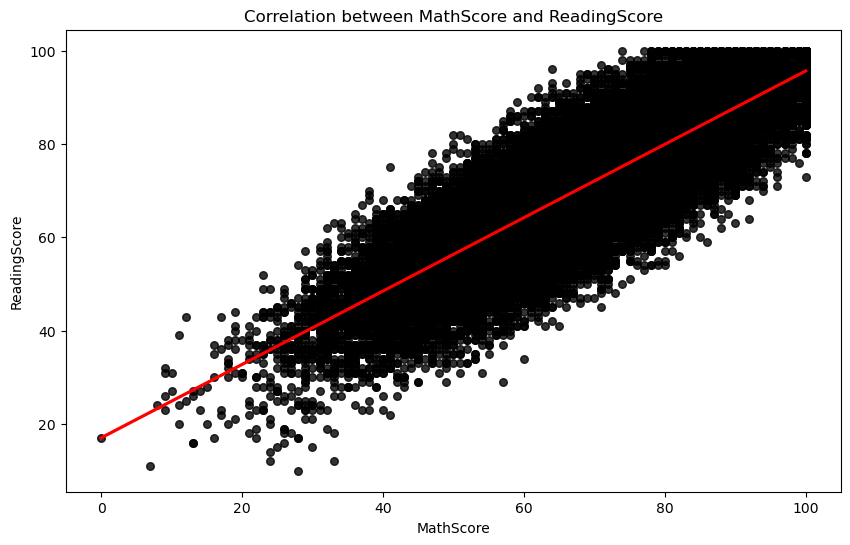

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='MathScore', y='ReadingScore', data=df, color='black',scatter_kws={'s':30}, line_kws={"color":"red"})
plt.title('Correlation between MathScore and ReadingScore')
plt.show()

### 15. Compare the average scores of students in different grades.

In [10]:
cursor.execute("""
    SELECT Grade , ROUND(AVG(TotalScore),2) AS AvgTotalScore
    FROM ExamScore
    GROUP BY Grade
    ORDER BY GRADE
""")
result = cursor.fetchall()
df = pd.DataFrame(result)
df

,0,1
0,A,281.00
1,B,251.96
2,C,223.05
3,D,193.93
4,E,150.99


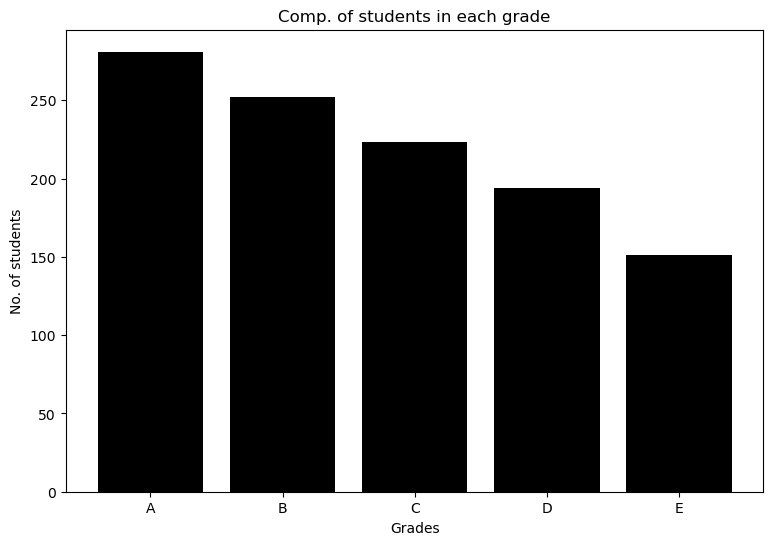

In [12]:
plt.figure(figsize = (9,6))

plt.bar(df[0],df[1],color='black')
plt.title('Comp. of students in each grade')
plt.xlabel('Grades')
plt.ylabel('No. of students')
plt.show()

### 16. Key factors that contribute to high Math scores

In [63]:
cursor.execute("""
    SELECT Gender, ParentEduc, LunchType, 
       AVG(MathScore) AS AvgMathScore
    FROM ExamScore
    GROUP BY Gender, ParentEduc, LunchType
    ORDER BY AvgMathScore DESC;
""")
pd.DataFrame(cursor.fetchall() , columns = ['Gender' , 'ParentEdu' , 'LunchType' , 'AvgMathScore'])

,Gender,ParentEdu,LunchType,AvgMathScore
0,male,master's degree,standard,79.6401
1,male,bachelor's degree,standard,77.8978
2,male,associate's degree,standard,74.8896
3,female,master's degree,standard,73.9211
4,male,some college,standard,73.3494
5,male,,standard,72.2492
6,female,bachelor's degree,standard,71.5010
7,male,high school,standard,70.7024
8,female,associate's degree,standard,70.4078
9,male,some high school,standard,69.2531


### 17. Performance difference across ethnic groups by lunch type

In [72]:
cursor.execute("""
    SELECT EthnicGroup, LunchType,  
       AVG(MathScore) AS AvgMathScore,
       AVG(ReadingScore) AS AvgReadingScore,
       AVG(WritingScore) AS AvgWritingScore
    FROM ExamScore
    GROUP BY EthnicGroup , LunchType
    ORDER BY AvgMathScore DESC,
             AvgReadingScore DESC,
             AvgWritingScore DESC
""")
pd.DataFrame(cursor.fetchall() , columns = ['EthnicGroup' , 'LunchType' , 'AvgMathScore' , 'AvgReadingScore' , 'AvgWritingScore'])

,EthnicGroup,LunchType,AvgMathScore,AvgReadingScore,AvgWritingScore
0,group E,standard,78.9371,76.6086,75.2895
1,group D,standard,72.0009,73.2771,74.0860
2,,standard,69.9430,71.3877,70.7608
3,group C,standard,68.8823,71.2558,70.1179
4,group E,free/reduced,68.6161,69.9639,67.8843
5,group B,standard,67.8970,70.3715,69.2909
6,group A,standard,67.1615,69.6705,68.5387
7,group D,free/reduced,59.7148,65.0924,65.0690
8,,free/reduced,58.6690,63.9293,62.1690
9,group C,free/reduced,57.0068,63.2575,61.2939


### 18. Create a histogram to visualize the distribution of total scores.

In [92]:
cursor.execute("""
    SELECT TotalScore
    FROM ExamScore
""")
result = cursor.fetchall()
df = pd.DataFrame(result , columns = ['TotalScore'])
df.head()

,TotalScore
0,216
1,247
2,271
3,143
4,229


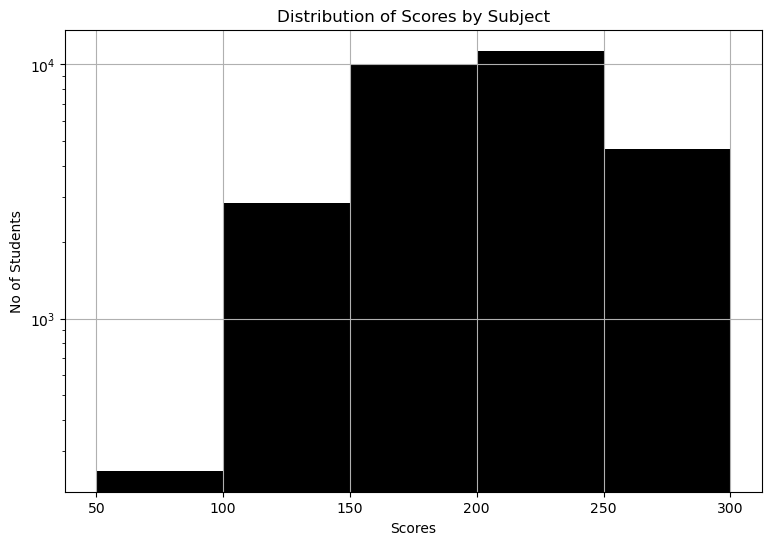

In [97]:
# Show Histogram to visualize the differences between all Subjects Scores.
plt.figure(figsize=(9,6))

plt.hist(df['TotalScore'] , bins = [50,100,150,200,250,300] , color='black',log='true')

plt.title('Distribution of Scores by Subject')
plt.xlabel('Scores')
plt.ylabel('No of Students')
plt.grid(True)
plt.show()

### 19. Examine if there's a significant difference between the scores of male and female students

In [21]:
cursor.execute("""
    SELECT Gender , AVG(TotalScore) , COUNT(Gender)
    FROM ExamScore
    GROUP BY Gender
""")

df = pd.DataFrame(cursor.fetchall() , columns = ['Gender','AvgTotalScore','No of Male/female'])
data = list(df['AvgTotalScore'])

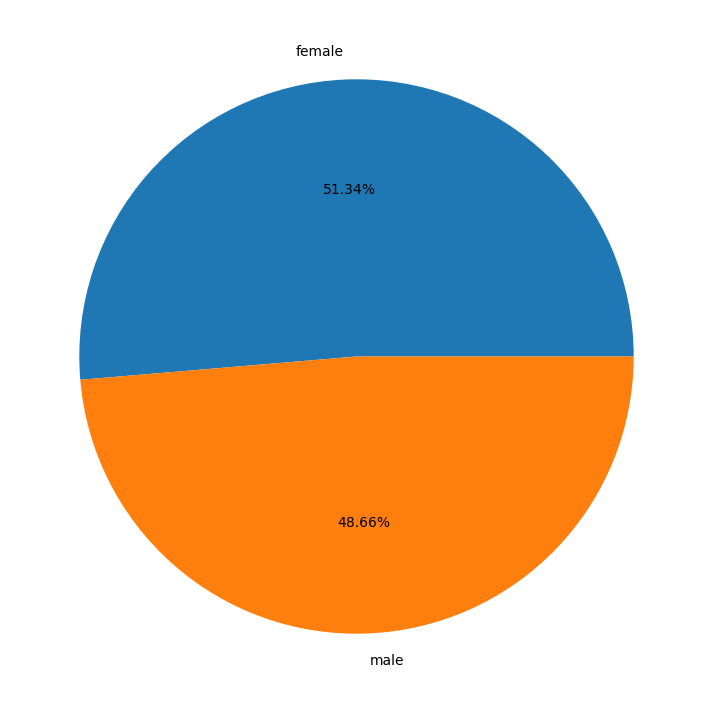

In [22]:
plt.figure(figsize = (9,9))
plt.pie(data , labels = df['Gender'] , autopct = '%0.2f%%')
plt.show()

### 20. Which ethnic group has the highest average MathScore, ReadingScore, and WritingScore?

In [55]:
cursor.execute("""
    SELECT EthnicGroup,
           AVG(MathScore) AS AvgMathScore,
           AVG(ReadingScore) AS AvgReadingScore,
           AVG(WritingScore) As avgWritingScore
    FROM ExamScore
    GROUP BY EthnicGroup
    ORDER BY AvgMathScore DESC, AvgReadingScore DESC, AvgWritingScore DESC
    LIMIT 1
""")
result = cursor.fetchall()
result = pd.DataFrame(result, columns = ['Group' ,'highestAvgMaths' , 'highestAvgReading' , 'highestAvgWriting']).set_index('Group')
result

,highestAvgMaths,highestAvgReading,highestAvgWriting
Group,,,
group E,75.2707,74.2482,72.6589


### 21. Gender distribution across ethnic groups

In [79]:
cursor.execute("""
   SELECT Gender , EthnicGroup , COUNT(*) AS no
   FROM ExamScore
   GROUP BY Gender , EthnicGroup 
   ORDER BY no DESC
""")
pd.DataFrame(cursor.fetchall() , columns = ['Gender' , 'EthnicGroup' , 'Count'])

,Gender,EthnicGroup,Count
0,male,group C,4385
1,female,group C,4378
2,female,group D,3568
3,male,group D,3538
4,female,group B,2822
5,male,group B,2724
6,female,group E,1918
7,male,group E,1902
8,female,group A,1065
9,male,group A,1031
